# Getting started
You first homework assignemnt is designed to get you setup and started with GitHub and Jupyter notebooks, as well as get comfortable with running some basic levy walk simulations. 
  
**Note:** This repository will be where you post your homeworks and other assignments throughout the semester.

---
## Part 1: Setting up Github & Jupyter Notebooks

1. Setup a GitHub account and create a new repository with the following name:
    * <your\_last\_name>\_BIX\_F21
    * Add the users _coaxlab0_ (that’s a zero at the end) and _clappm_ as collaborators.

2. Clone the repository locally on your computer

3. Install jupyter notebooks on your computer. (Be sure it is integrated with at least Python 3.7)

4. Download this template notebook into your class repository

5. Push your Jupyter notebook to the repository you made on Github after saving and completing part 2.

---
## Part 2: Simple random walk simulations

Next you will run a few simulations to see how the different parameters on random walk (Gaussian vs. Levy) influence the behavior of the agents.

Fill out the code cells below to complete the assignment.  Most of the programming is extremely straight-forward, as it is all based on the code from the lab, which you can use/modify in this notebook.

### Install _explorationlib_

In [ ]:
### your code below
#code copied from Lab 1
!pip install --upgrade git+https://github.com/parenthetical-e/explorationlib
!pip install --upgrade git+https://github.com/MattChanTK/gym-maze.git
!pip install celluloid # for the gifs
### your code above

  Cloning https://github.com/parenthetical-e/explorationlib to /tmp/pip-req-build-lpq55gs0
  Running command git clone -q https://github.com/parenthetical-e/explorationlib /tmp/pip-req-build-lpq55gs0
  Created wheel for explorationlib: filename=explorationlib-0.0.1-py3-none-any.whl size=24681 sha256=0b8b37ca3ac9d3d42b2e97ac0ea0aabaf4bf78ed6572d5e25351b8e3d489a5ea
  Stored in directory: /tmp/pip-ephem-wheel-cache-rtao9bcm/wheels/66/4e/7a/e9f6ae3eff8a06bc71faf2690450f976e9ae776c7a5a6486a4
Successfully built explorationlib
  Cloning https://github.com/MattChanTK/gym-maze.git to /tmp/pip-req-build-aw6c3ohv
  Running command git clone -q https://github.com/MattChanTK/gym-maze.git /tmp/pip-req-build-aw6c3ohv
     |████████████████████████████████| 11.8 MB 13.4 MB/s 
  Created wheel for gym-maze: filename=gym_maze-0.4-py3-none-any.whl size=14241 sha256=c655edbcb8d5d8552bff8450fdfe4183a05e88f44e56481e6ebd3c4c43f1a934
  Stored in directory: /tmp/pip-ephem-wheel-cache-ssa4qvcn/wheels/01/f8/86/0d

### Import modules

In [ ]:
### your code below
#code copied from Lab 1
# from the standard library
import shutil
import glob
import os
import copy
import sys

# these are common to scientific programming in python
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Computational experiments are run with 'experiment'
from explorationlib.run import experiment

# Here are some tools to select, save, and load
# data from computational experiments
from explorationlib.util import select_exp
from explorationlib.util import load
from explorationlib.util import save

# All the explorers we will play with are called
# "agents"; a bit of computer science jargon
from explorationlib.agent import Diffusion2d
from explorationlib.agent import Levy2d
from explorationlib.agent import TruncatedLevy2d

# The environments we will simulate live in a "gym"
from explorationlib.local_gym import Field
from explorationlib.local_gym import Bounded
from explorationlib.local_gym import Grid 
from explorationlib.local_gym import uniform_targets
from explorationlib.local_gym import constant_values

# A bunch of tools for plotting and for
# movie making
from explorationlib.plot import plot_position2d
from explorationlib.plot import plot_length_hist
from explorationlib.plot import plot_length
from explorationlib.plot import plot_targets2d
from explorationlib.plot import show_gif

# A couple metrics for scoring how well, or poorly,
# an exploration experiment went.
from explorationlib.score import search_efficiency
from explorationlib.score import total_reward
from explorationlib.score import first_reward
### your code above

/usr/local/lib/python3.7/dist-packages/explorationlib/run.py:9: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


pygame 2.0.1 (SDL 2.0.14, Python 3.7.12)
Hello from the pygame community. https://www.pygame.org/contribute.html


### Additional notebook configuration

In [ ]:
### your code below
#code copied from Lab 1
%matplotlib inline
%config InlineBackend.figure_format='retina'
%config IPCompleter.greedy=True

plt.rcParams["axes.facecolor"] = "white"
plt.rcParams["figure.facecolor"] = "white"
plt.rcParams["font.size"] = "16"

%config IPCompleter.greedy=True
%load_ext autoreload
%autoreload 2
### your code above

## Section - Increasing Step Size

Run a batch of simulation with an increased step size (the baseline value is `0.1`).  The code for running these simulations will be essentially identical to the simulation code in the lab.

### Initialize and run the experiments

- set the parameters
- create the environment
- create the agents
- run the experiments

Feel free to create as many code cells as you would like.

In [ ]:
### your code below
#code copied from Lab 1 with slight change
# Setup
num_steps = 10000       # how many exploration steps in space?
num_experiments = 10    # we want to run ten experiments
detection_radius = 1

num_targets = 500

min_length = 0.1
step_size = 1.0  # Should be < (2 * detection_radius)
### your code above

In [ ]:
### your code below
#code copied from Lab 1
# Create env as an empty field
env = Field()
### your code above

In [ ]:
### your code below
#code copied from Lab 1
# Targets
target_boundary = (50, 50)
targets = uniform_targets(num_targets, target_boundary)
values = constant_values(targets, 1)
env.add_targets(targets, values, detection_radius=detection_radius)
### your code above

In [ ]:
### your code below
#code copied from Lab 1
# Create agents
diffusion = Diffusion2d(
    min_length=min_length, 
    scale=0.1, 
    detection_radius=detection_radius, 
    step_size=step_size,
)

levy = Levy2d(min_length=min_length, 
    exponent=2, 
    detection_radius=detection_radius, 
    step_size=step_size,
)
### your code above

In [ ]:
### your code below
#code copied from Lab 1
# experiments
levy_exp = experiment(
    f"levy_1", 
    levy, 
    env, 
    num_steps=num_steps, 
    num_experiments=num_experiments,
    seed=59393,
    dump=False,
)
diffusion_exp = experiment(
    f"diffusion_1", 
    diffusion, 
    env, 
    num_steps=num_steps, 
    num_experiments=num_experiments,
    seed=59393,
    dump=False,
)
### your code above

levy_1:   0%|          | 0/10 [00:00<?, ?it/s]

diffusion_1:   0%|          | 0/10 [00:00<?, ?it/s]

### Visualize the trajectories

Plot the trajectories taken by the agents

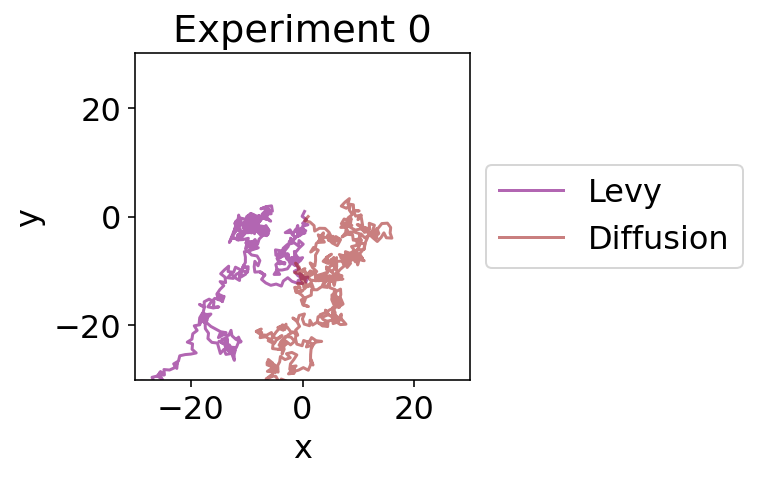

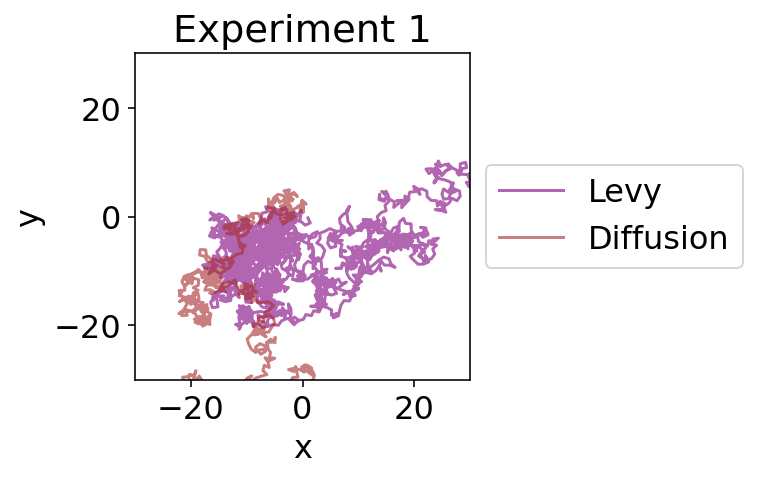

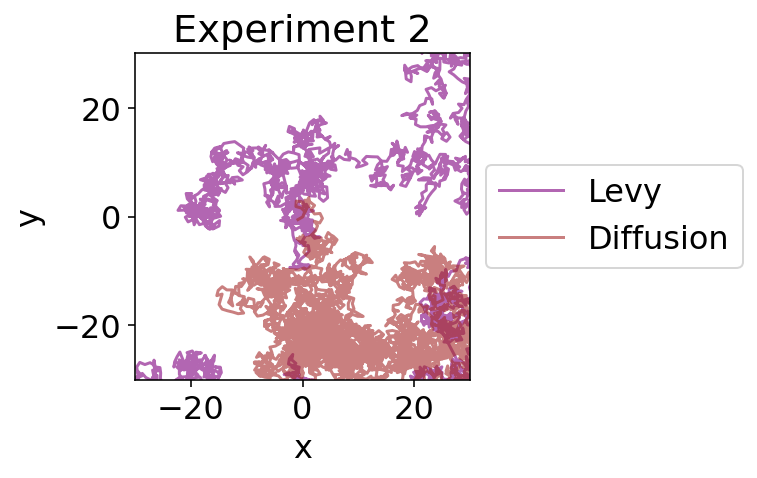

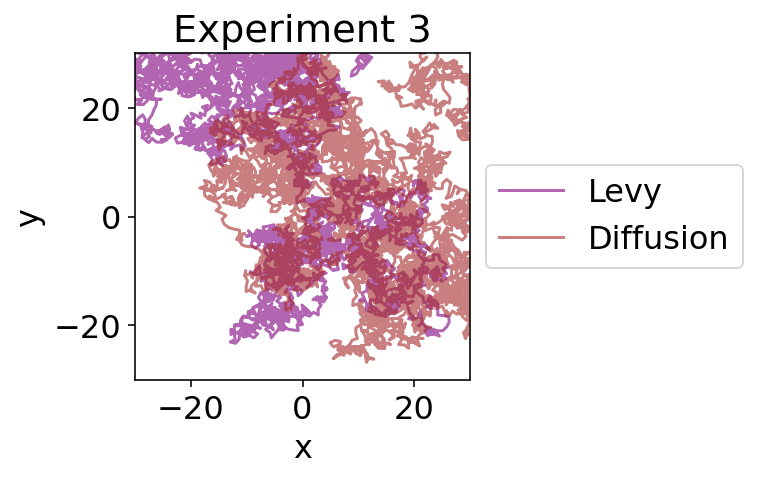

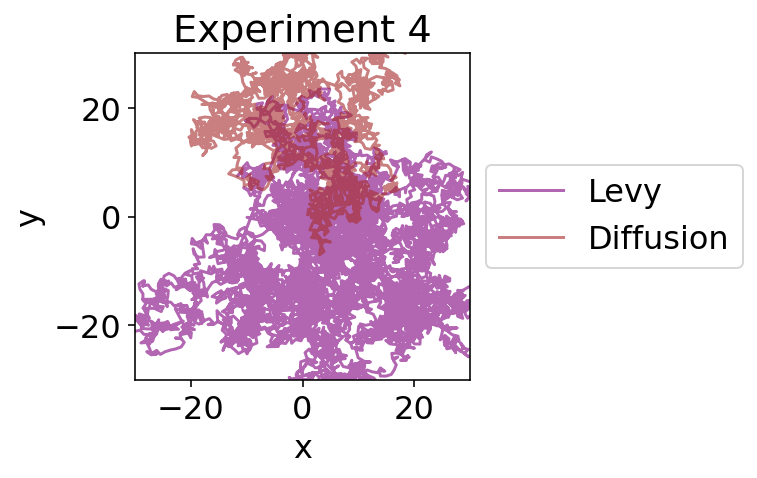

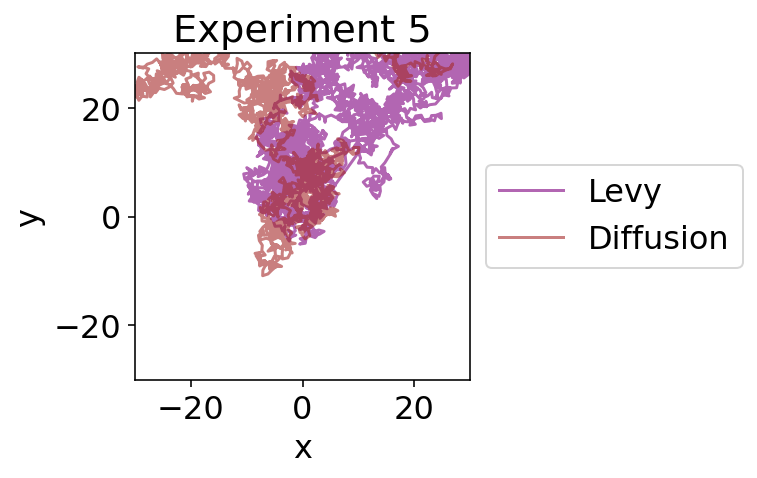

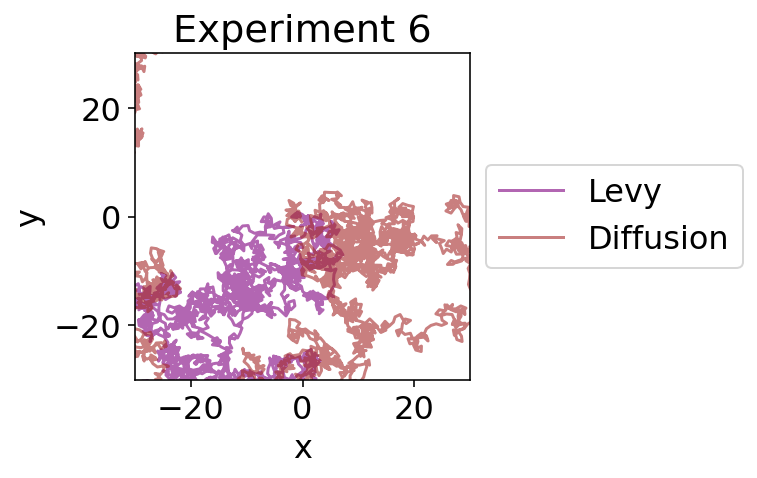

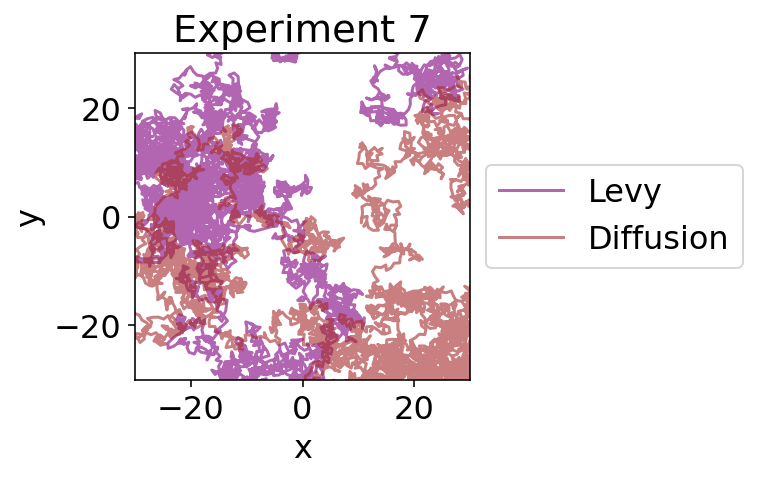

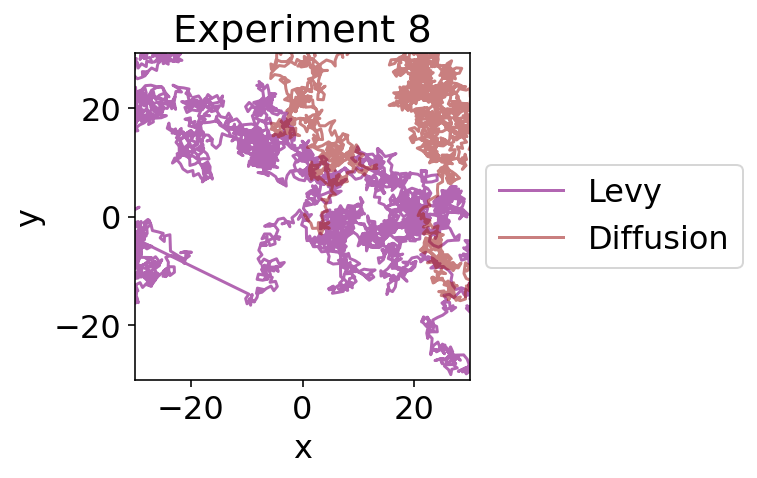

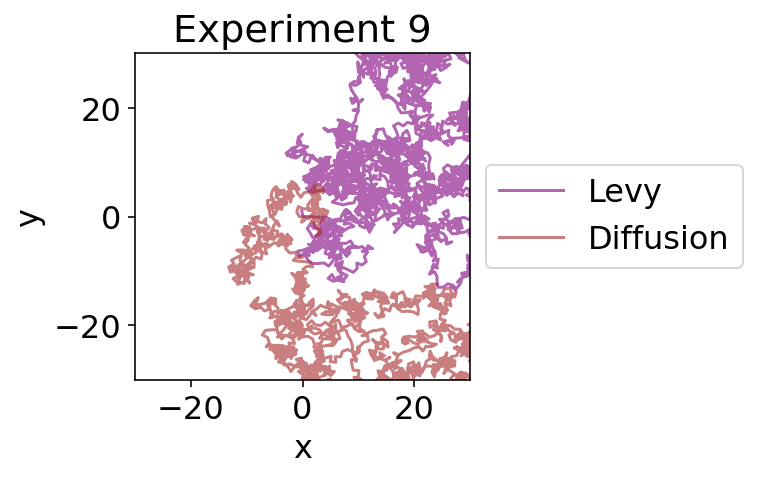

In [ ]:
### your code below
#code copied from Lab 1
# View size
plot_boundary = (30, 30)

# Generate 10 plots of walking
for n in range(num_experiments):
    ax = None
    ax = plot_position2d(
        select_exp(levy_exp, n),
        boundary=plot_boundary,
        label=f"Levy",
        color="purple",
        alpha=0.6,
        ax=ax,
    )
    ax = plot_position2d(
        select_exp(diffusion_exp, n),
        boundary=plot_boundary,
        label=f"Diffusion",
        title=f"Experiment {n}",
        color="brown",
        alpha=0.6,
        ax=ax,
    )
### your code above

### Question: How do these trajectories compare to those observed during the lab?  What effect did increasing the step size have?

Increasing the step-size caused the total distance covered to increase drastically. The comparison between the Levy and Diffusion tactics remains very similar however since both increased by the same ratio.

## Section - Increasing Detection Radius

Run a batch of simulation with an increased detection radius (the baseline value is `1`).

### Initialize and run the experiments

- set the parameters
- create the environment
- create the agents
- run the experiments

Feel free to create as many code cells as you would like.

In [ ]:
### your code below
#code copied from Lab 1 with slight change
# Setup
num_steps = 10000       # how many exploration steps in space?
num_experiments = 10    # we want to run ten experiments
detection_radius = 3

num_targets = 500

min_length = 0.1
step_size = 0.1  # Should be < (2 * detection_radius)
### your code above

In [ ]:
### your code below
#code copied from Lab 1
# Create env as an empty field
env = Field()
# Targets
target_boundary = (50, 50)
targets = uniform_targets(num_targets, target_boundary)
values = constant_values(targets, 1)
env.add_targets(targets, values, detection_radius=detection_radius)
### your code above

In [ ]:
### your code below
#code copied from Lab 1
# Create agents
diffusion = Diffusion2d(
    min_length=min_length, 
    scale=0.1, 
    detection_radius=detection_radius, 
    step_size=step_size,
)

levy = Levy2d(min_length=min_length, 
    exponent=2, 
    detection_radius=detection_radius, 
    step_size=step_size,
)
### your code above

In [ ]:
### your code below
#code copied from Lab 1
# experiments
levy_exp = experiment(
    f"levy_1", 
    levy, 
    env, 
    num_steps=num_steps, 
    num_experiments=num_experiments,
    seed=59393,
    dump=False,
)
diffusion_exp = experiment(
    f"diffusion_1", 
    diffusion, 
    env, 
    num_steps=num_steps, 
    num_experiments=num_experiments,
    seed=59393,
    dump=False,
)
### your code above

levy_1:   0%|          | 0/10 [00:00<?, ?it/s]

diffusion_1:   0%|          | 0/10 [00:00<?, ?it/s]

### Visualize the average reward

Plot the average reward values acheived by each of the agents

search_efficiency:   0%|          | 0/10 [00:00<?, ?it/s]

search_efficiency:   0%|          | 0/10 [00:00<?, ?it/s]

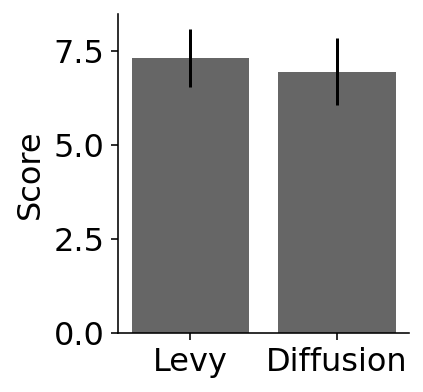

In [ ]:
### your code below
#code copied from Lab 1
#Results, names, and colors
results = [levy_exp, diffusion_exp]
names = ["Levy", "Diffusion"]
colors = ["purple", "brown"]

# Score by eff
scores = []
for name, res, color in zip(names, results, colors):
    r = search_efficiency(res)
    scores.append(r)

# Tabulate
m, sd = [], []
for (name, s, c) in zip(names, scores, colors):
    m.append(np.mean(s))
    sd.append(np.std(s))

# Plot
fig = plt.figure(figsize=(3, 3))
plt.bar(names, m, yerr=sd, color="black", alpha=0.6)
plt.ylabel("Score")
plt.tight_layout()
sns.despine()
### your code above

### Question: How do these average reward values compare to those observed during the lab? What effect did increasing the detection radius have?

The average reward values were higher for both Levy and Diffusion by about the same ratio compared to Lab 1. Since the agents could spot the reward from further away they were able to obtain more of them. The comparison between Levy and Diffusion is approximetly the same as in the Lab however, since both tactics are very similar.

**DUE:** 5pm EST, Sept 23, 2021. Email the link to the completed notebook on your Github repository to the TA and me via Canvas.

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here. 
> Maya helped me navigate github since I haven't used it before